In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [4]:
df.nunique()

Id                  1064
Company               23
Model                218
Variant              575
FuelType               5
Colour                76
Kilometer           1006
BodyStyle             10
TransmissionType       9
ManufactureDate      162
ModelYear             17
CngKit                 2
Price                367
Owner                  4
DealerState           10
DealerName            57
City                  11
Warranty               2
QualityScore          43
dtype: int64

In [5]:
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

## Data Preprocessing

In [4]:
# Define a function for convert price to float value
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [5]:
# Drop Unnecessary Columns
df = df.drop(['Id', 'CngKit', 'TransmissionType'], axis=1)

# Apply fillna on FuelType column
df['FuelType'] = df['FuelType'].fillna('PETROL')

In [6]:
# Define a function for reduce unique values of categorical columns
def unique_reduce(x, dic):
    if x in dic.keys():
        return x
    else :
        return 'Others'

In [7]:
fuel_dic = dict(df['FuelType'].value_counts().head(2))
df['FuelType'] = df['FuelType'].apply(lambda x : unique_reduce(x, fuel_dic))
df['FuelType'].value_counts()

FuelType
PETROL    671
DIESEL    365
Others     28
Name: count, dtype: int64

In [8]:
company_dic = df['Company'].value_counts().head(7)
df['Company'] = df['Company'].apply(lambda x : unique_reduce(x, company_dic))
df['Company'].value_counts()

Company
MARUTI SUZUKI    252
Others           219
HYUNDAI          199
HONDA            126
MAHINDRA          96
TATA              60
FORD              58
TOYOTA            54
Name: count, dtype: int64

In [9]:
color_dic = df['Colour'].value_counts().head(5)
df['Colour'] = df['Colour'].apply(lambda x : unique_reduce(x, color_dic))
df['Colour'].value_counts()

Colour
Others    341
White     289
Silver    134
Grey      127
Red       109
Black      64
Name: count, dtype: int64

In [10]:
body_dic = df['BodyStyle'].value_counts().head(3)
df['BodyStyle'] = df['BodyStyle'].apply(lambda x : unique_reduce(x, body_dic))
df['BodyStyle'].value_counts()

BodyStyle
HATCHBACK    423
SUV          304
SEDAN        262
Others        75
Name: count, dtype: int64

In [11]:
dealer_dic = df['DealerState'].value_counts().head(4)
df['DealerState'] = df['DealerState'].apply(lambda x : unique_reduce(x, dealer_dic))
df['DealerState'].value_counts()

DealerState
Others         355
Delhi          196
Maharashtra    194
Karnataka      165
Haryana        154
Name: count, dtype: int64

In [12]:
city_dic = df['City'].value_counts().head(6)
df['City'] = df['City'].apply(lambda x : unique_reduce(x, city_dic))
df['City'].value_counts()

City
Others       234
Delhi        196
Bangalore    165
Gurgaon      154
Pune         147
Noida         95
Kolkata       73
Name: count, dtype: int64

In [13]:
def dealer_category(x):
    if x in ['Car Estate', 'Carz Villa', 'SUSHIL CARS PVT. LTD', 'Taneja Fourwheels', 'Car Choice Exclusif', 'Fast Wheels Cars', 'K.S. Motors']:
        return 'Dealer Type1'
    elif x in ['Sai Motors', 'LUXMI CARS GURGAON', 'Guru Kripa Motors', 'Star Auto India']:
        return 'Dealer Type2'
    elif x in ['Shree Radha Krishna Motors', 'Shiv Auto Wings', 'Mahindra First Choice Wheels Ltd', 'Noida Car Point ll', 'Jeen Mata Motors', 'OM Motors', 'Sireesh Auto Pvt Ltd', 'Max Motors', 'Adeep Motors']:
        return 'Dealer Type3'
    elif x in ['Ikka Motors', 'Pitbox Motors', 'Noida Car Ghar', 'Cardiction', 'Car&Bike Superstore Pune', 'Zippy Automart', 'SK Associates', 'Anant Cars Auto Pvt Ltd', 'DrivUS Motorcorp', 'Vinayak Autolink Private Limited'] : 
        return 'Dealer Type4'
    elif x in ['Prestige Autoworld Pvt Ltd', 'PROPEL MOTORS', 'Royal Motors (Prop. Auto Carriage Pvt Ltd)', 'MM Motors', 'Sri Vaishnavi Cars', 'Top Gear Cars', 'Renew 4 u Automobiles PVT Ltd'] :
        return 'Dealer Type5'
    else :
        return 'Other Dealers'

df['DealerName'] = df['DealerName'].apply(lambda x : dealer_category(x))
df['DealerName'].value_counts()

DealerName
Other Dealers    209
Dealer Type4     199
Dealer Type5     188
Dealer Type3     182
Dealer Type1     180
Dealer Type2     106
Name: count, dtype: int64

In [14]:
# change type of owner column to int and remove 3 and 4 values 
df['Owner'] = df['Owner'].str[0]
df['Owner'] = df['Owner'].map(int)
df= df[df['Owner'] < 3 ]

## Data Visualization

In [15]:
# Define list of Continuous columns Names
continuous = ['Price', 'Kilometer', 'QualityScore']

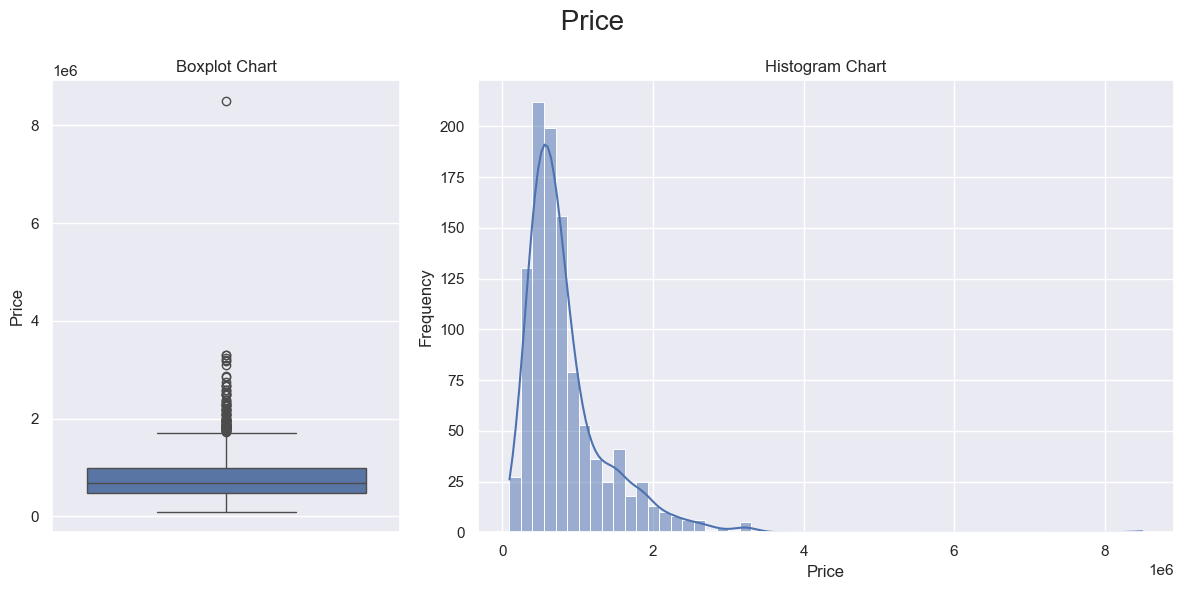

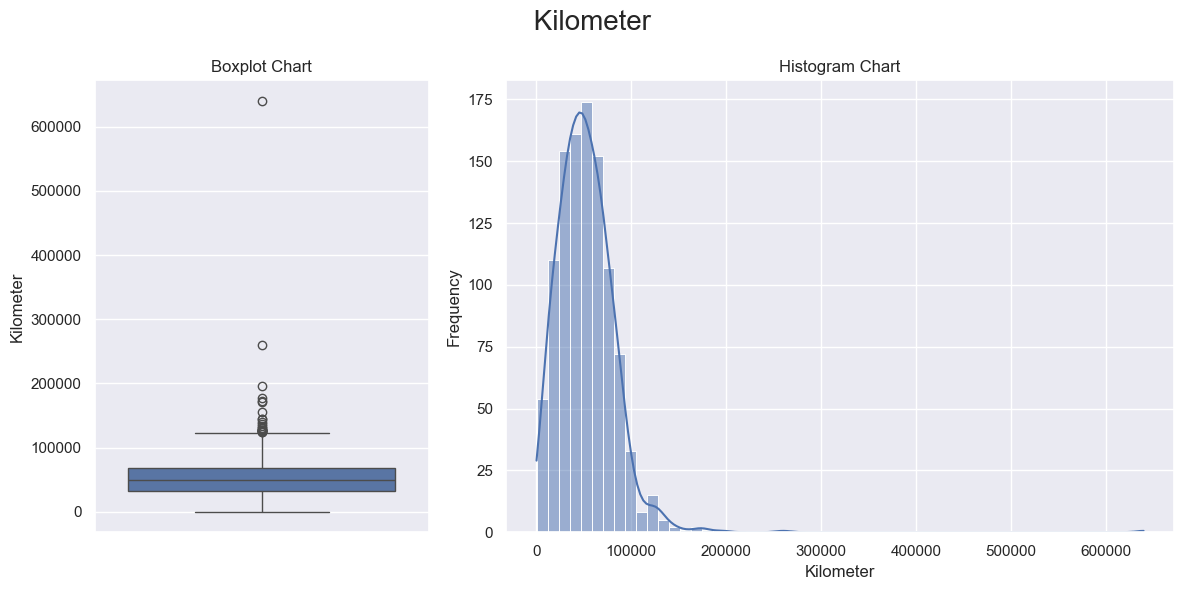

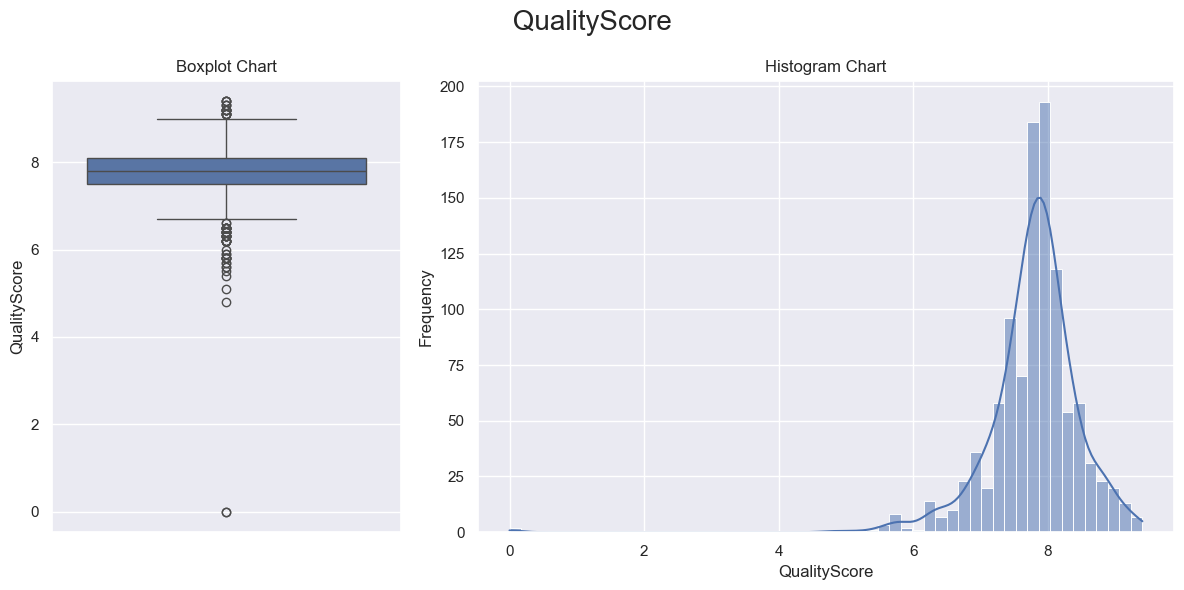

In [16]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti)    

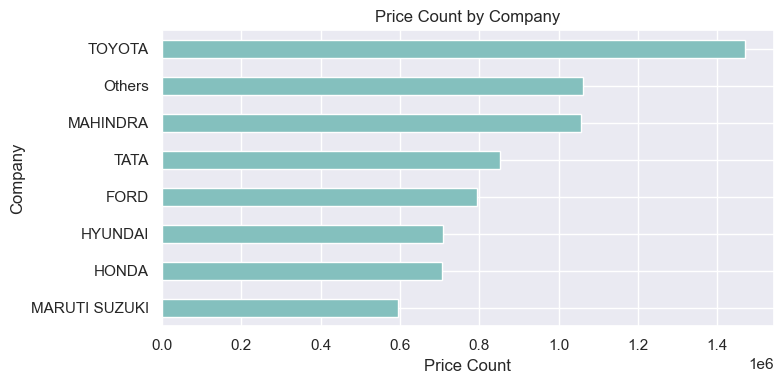

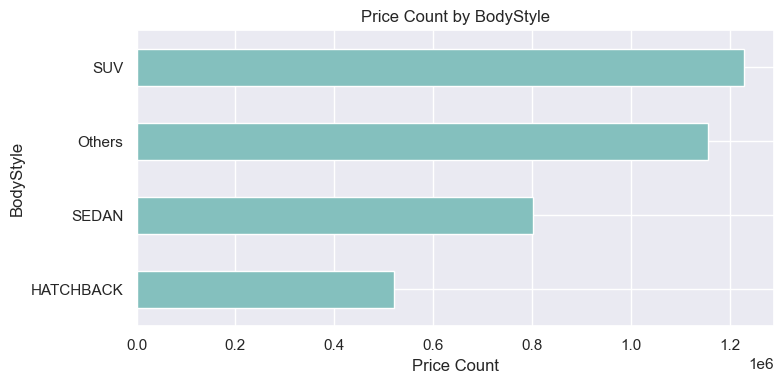

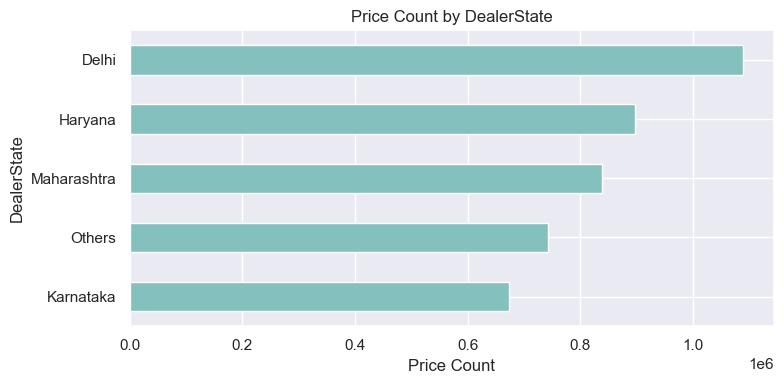

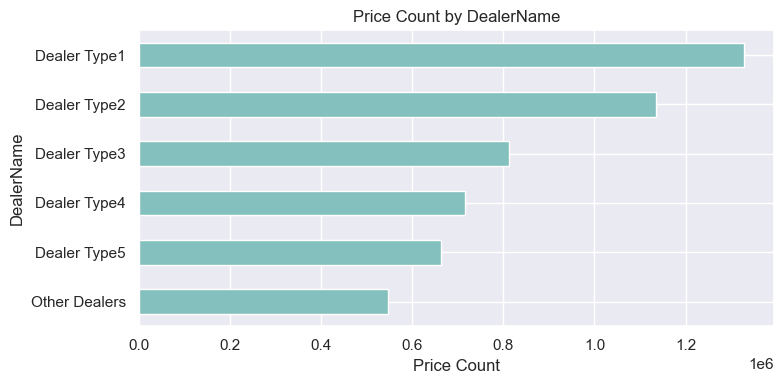

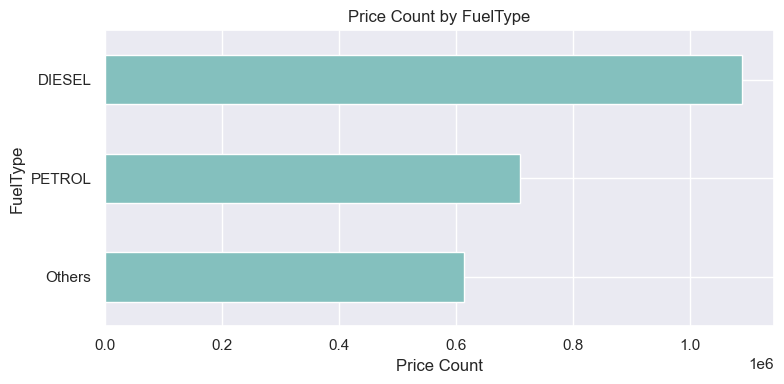

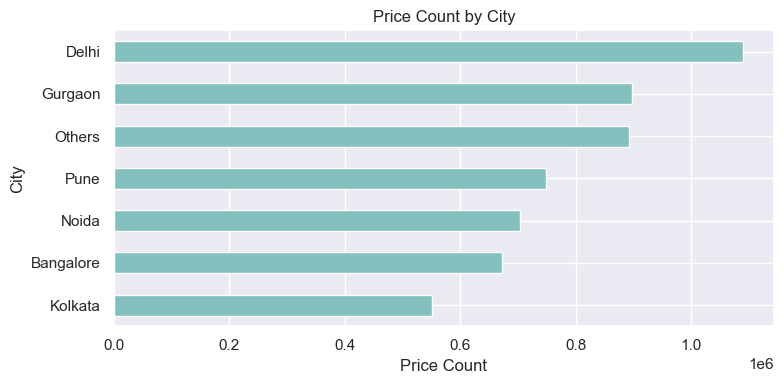

In [18]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#84c0be', figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Company', 'Price', df)
bar_plot('BodyStyle', 'Price', df)
bar_plot('DealerState', 'Price', df)
bar_plot('DealerName', 'Price', df)
bar_plot('FuelType', 'Price', df)
bar_plot('City', 'Price', df)

## Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['Kilometer', 'Price', 'QualityScore']
dum_cols = ['Company', 'FuelType', 'Colour', 'BodyStyle', 'DealerState', 'DealerName', 'City']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])
# Apply Get Dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [31]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Price', 'Model', 'Variant', 'ManufactureDate'], axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
#Importing the Libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# List of Mdels to Try
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Linear Regression: Mean Squared Error = 0.243, R-squared = 0.66
Ridge Regression: Mean Squared Error = 0.243, R-squared = 0.66
Decision Tree: Mean Squared Error = 0.51, R-squared = 0.286
Random Forest: Mean Squared Error = 0.184, R-squared = 0.742
Gradient Boosting: Mean Squared Error = 0.209, R-squared = 0.708
K-Nearest Neighbors: Mean Squared Error = 0.275, R-squared = 0.615
XGB Regressor: Mean Squared Error = 0.212, R-squared = 0.703


In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [160, 150, 170],
    'max_depth': [None, 10, 20],
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestRegressor(**rf_best_params, random_state=42)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [41]:
# Evaluate the tuned Random Forest model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'Mean Squared Error (Tuned Random Forest): {round(mse_best, 3)}')
print(f'R-squared (Tuned Random Forest): {round(r2_best, 3)}')

Best Parameters: {'max_depth': 10, 'n_estimators': 150}
Mean Squared Error (Tuned Random Forest): 0.18
R-squared (Tuned Random Forest): 0.748


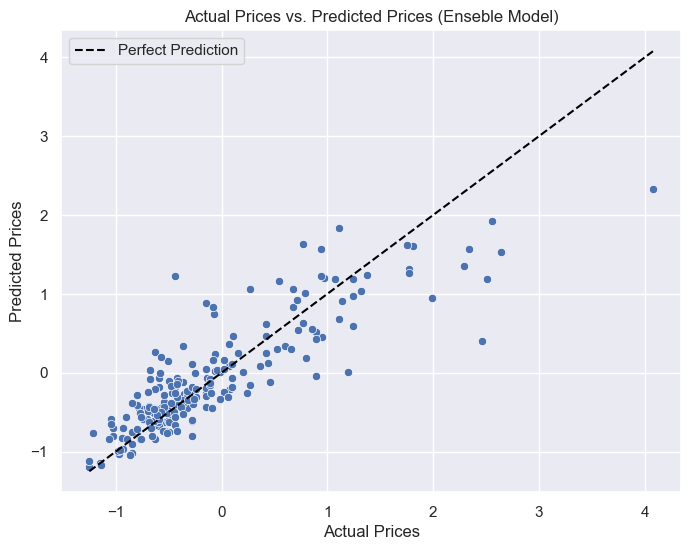

In [42]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Enseble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion

In this project, I focused on predicting the prices of used cars in India using various data preprocessing techniques and a machine learning model. The steps and methodologies employed are as follows:

1. Data Cleaning and Preprocessing:
   - String to Numeric Conversion: Converted values in the price column from strings to numeric format.
   - Handling Missing Values: Removed columns with a high number of null values to ensure data quality and consistency.
   - Categorical Simplification: Reduced the number of unique values in some categorical columns to simplify the model.

2. Data Visualization:
   - Created appropriate visualizations to explore and understand the data patterns and relationships, providing valuable insights into the dataset.

3. Data Standardization and Label Encoding:
   - Performed data standardization to normalize the features.
   - Applied label encoding to convert categorical variables into numerical format.

4. Model Training and Optimization:
   - Trained a Random Forest model on the processed dataset.
   - Optimized the model using Grid Search to improve accuracy.

5. Model Evaluation:
   - The final model achieved an accuracy of 74.8%. Given the complexity of the model and the variability of the data, this result is considered satisfactory.

These steps ensured a comprehensive analysis and model training process, leading to a reasonably accurate prediction model for used car prices in Indi
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com
